Los datos que se muestran a continuaci ́on se hallan en el archivo buffalo.txt y correspon-
den a la mediciones de cantidad de nieve ca ́ıda (en pulgadas) en Buffalo en los inviernos de

1910/1911 a 1972/1973.

In [9]:
datos <- scan('./buffalo.txt')

# $$\huge \mathcal 1.$$

1. Realice un histograma para estos datos utilizando los par ́ametros por default. Repetir
eligiendo como puntos de corte las siguientes secuencias: i) de 20 a 140 con paso 10 y ii)
de 20 a 140 con paso 5. Comparar los tres histogramas obtenidos. ¿Tiene alg ́un efecto el
refinamiento de los bins?

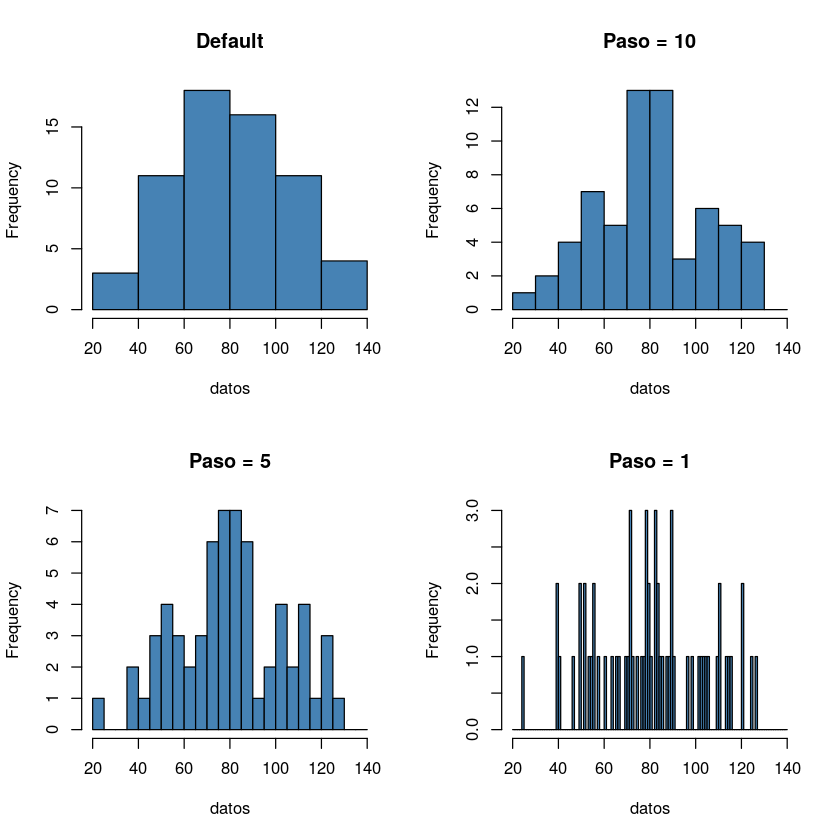

In [16]:
par(mfrow=c(2,2))
hist(datos, col='steelblue',main="Default")
hist(datos, col='steelblue', breaks=seq(20,140,10),main="Paso = 10")
hist(datos, col='steelblue', breaks=seq(20,140,5),main="Paso = 5")
hist(datos, col='steelblue', breaks=seq(20,140,1),main="Paso = 1")

# $$\huge \mathcal 2.$$

2. Realice un histograma para estas observaciones utilizando puntos de corte (10, 20, 30, 40,
50, 60, 70, 80, 90, 100, 110, 120, 130). Repita corriendo el punto de inicio de los bins en
2 unidades 2 veces consecutivas. Compare los tres histogramas obtenidos. ¿Tiene alg ́un
efecto la elecci ́on del punto inicial en este ejemplo?

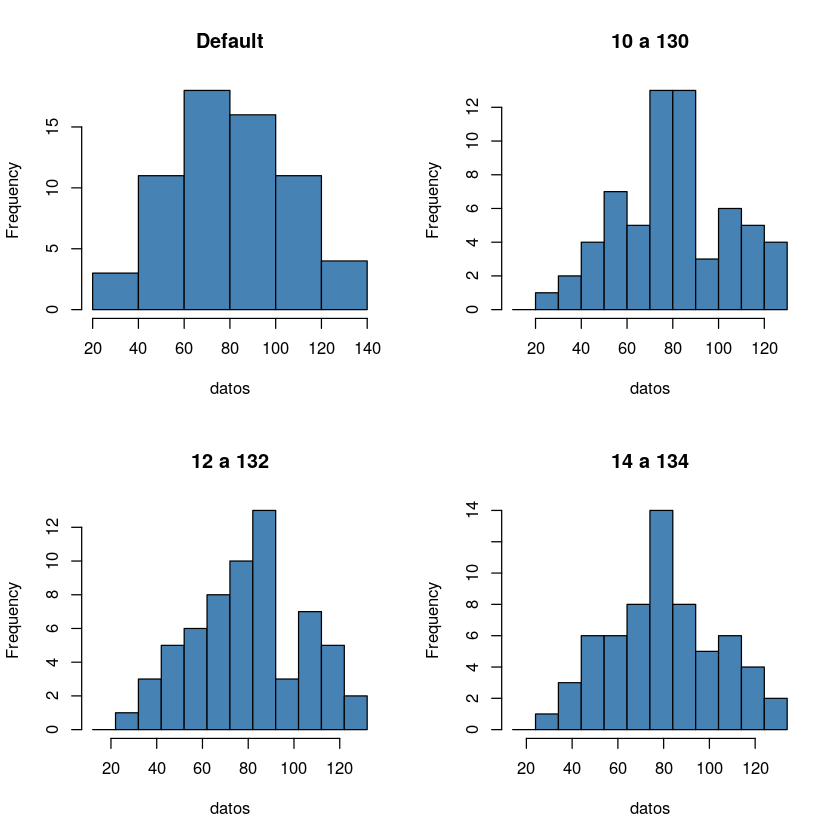

In [17]:
par(mfrow=c(2,2))
hist(datos, col='steelblue',main="Default")
hist(datos, col='steelblue', breaks=seq(10,130,10),main="10 a 130")
hist(datos, col='steelblue', breaks=seq(12,132,10),main="12 a 132")
hist(datos, col='steelblue', breaks=seq(14,134,10),main="14 a 134")

# $$\huge \mathcal 3.$$

3. Implemente una funci ́on densidad.est.parzen que tenga por argumento un conjunto
de datos x = (x1, . . . , xn), una ventana h y un punto x y devuelva fbh(x), el valor de la
estimaci ́on de la densidad f en el punto x, utilizando el n ́ucleo uniforme (tambi ́en llamado
rectangular).

## Estimador de Parzen

> $$\large \hat f_h(z) = \frac 1 {n h} \sum_{i=1}^n \mathbf K \left( \frac {z - X_i}{h} \right)$$

donde

> $ \large \mathbf K \left( t \right) = \frac 1 2 \mathbf 1\{ t \in [-1,1] \}$

Es el kernel uniforme $[-1,1]$ (aka núcleo rectangular)

In [21]:
densidad.est.parzen <- function(X, h, z){
    n <- length(X)
    t <- (z - X) / h
    Kt <- 0.5 * (t > -1 & t < 1)
    
    fhz <- 1 / (n*h) * sum(Kt) 
    
    return(fhz)
}

# $$\huge \mathcal 4.$$

4. Con la funci ́on densidad.est.parzen implementada, estime la densidad f en el inter-
valo (25,126.4) (m ́ınimo y m ́aximo de las observaciones) sobre una grilla de 200 puntos

equiespaciados para h = 10. Grafique el estimador fbh(x) obtenido.

In [22]:
Ngrilla <- 200
grilla.z <- seq(min(datos), max(datos), length=Ngrilla)

In [37]:
h.10  <- 10
h.05 <- 0.5
h.2  <- 2
f_hat.10  <- rep(NA, Ngrilla)
f_hat.05 <- rep(NA, Ngrilla)
f_hat.2  <- rep(NA, Ngrilla)
for(i in 1:Ngrilla){
    f_hat.10[i]   <- densidad.est.parzen(datos, h.10, grilla.z[i])
    f_hat.05[i]  <- densidad.est.parzen(datos, h.05, grilla.z[i])
    f_hat.2[i]   <- densidad.est.parzen(datos, h.2, grilla.z[i])
}

In [38]:
#?plotmath

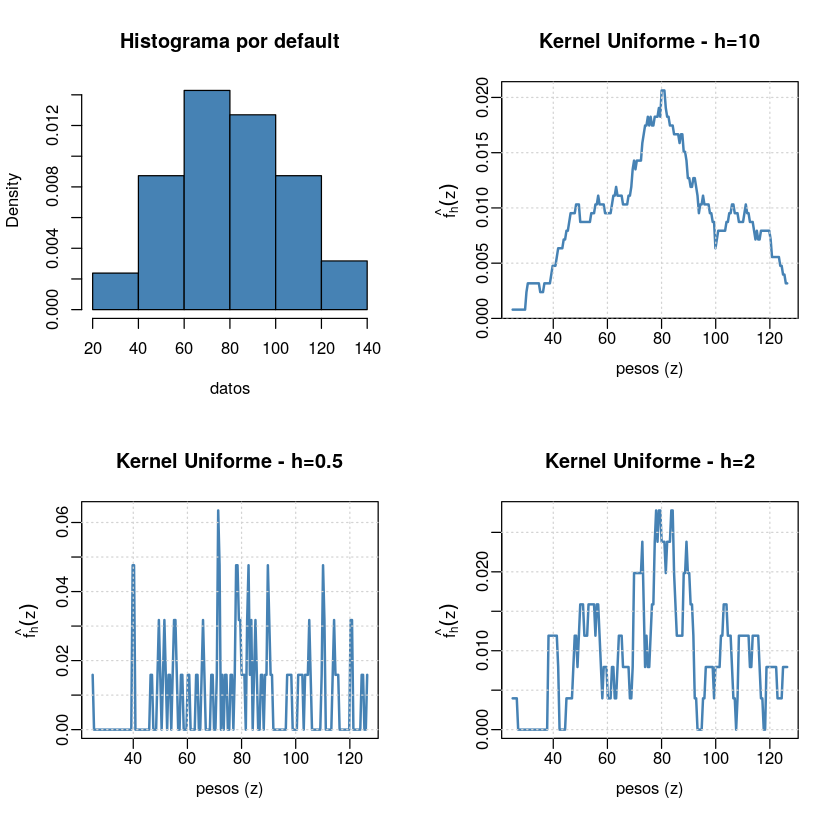

In [39]:
par(mfrow=c(2,2))
hist(datos, col="steelblue", prob=T, main="Histograma por default")
plot(grilla.z, f_hat.10, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.05, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=0.5", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.2, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=2", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()

5. Estime la funci ́on de densidad f de la variable pulgadas de nieve ca ́ıda en invierno a
partir de los datos de Buffalo a trav ́es de la funci ́on densidad.est.parzen implementada
en el item anterior usando h = 10. Realice un histograma para los datos de Buffalo y
superponga la densidad estimada en los datos mediante la funci ́on densidad.est.parzen
utilizando h = 10, 20 y 30. Observe como var ́ıa la rugosidad de los estimadores de f
obtenidos.

In [40]:
h.10 <- 10
h.20 <- 20
h.30 <- 30
f_hat.10 <- rep(NA, Ngrilla)
f_hat.20 <- rep(NA, Ngrilla)
f_hat.30 <- rep(NA, Ngrilla)
for(i in 1:Ngrilla){
    f_hat.10[i]  <- densidad.est.parzen(datos, h.10, grilla.z[i])
    f_hat.20[i]  <- densidad.est.parzen(datos, h.20, grilla.z[i])
    f_hat.30[i]  <- densidad.est.parzen(datos, h.30, grilla.z[i])
}

In [41]:
#?plotmath

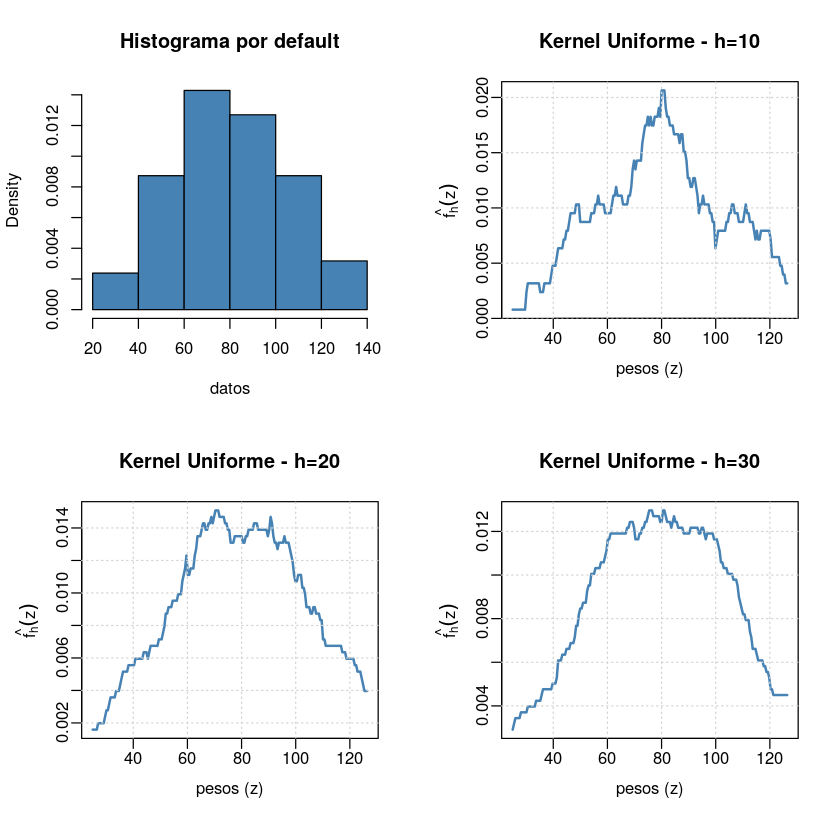

In [42]:
par(mfrow=c(2,2))
hist(datos, col="steelblue", prob=T, main="Histograma por default")
plot(grilla.z, f_hat.10, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=10", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.20, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=20", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()
plot(grilla.z, f_hat.30, type='l', col='steelblue', lwd=2,main = "Kernel Uniforme - h=30", xlab='pesos (z)', ylab=expression(hat(f[h])(z)), mgp=c(2,0.5,0))
grid()

6. La funci ́on de R density computa un estimador de la densidad a partir de un conjunto
de datos x = (x1, . . . , xn) y la eval ́ua en un conjunto de puntos intermedios. Mediante
la funci ́on de R density estime la funci ́on de densidad f de la variable pulgadas de
nieve ca ́ıda en invierno a partir de los datos de Buffalo y utilizando el n ́ucleo normal,
el rectangular y el de Epanechnikov con ventana h = 5. Realice un gr ́afico en el que
superpone las tres estimaciones de f y compare los resultados.